In [146]:
import numpy as np
import matplotlib.pyplot as plt

In [147]:
# Definições iniciais e parâmetros
m1 = 56.0       # Massa 1 (kg), 80% da massa total de 70 kg
m2 = 14.0       # Massa 2 (kg), 20% da massa total de 70 kg
k1 = 34.1       # Constante da mola 1 (N/m)
k2 = 78.4       # Constante da mola 2 (N/m)
c = 0.35        # Coeficiente de amortecimento (N.s/m)
g = -9.81       # Aceleração devido à gravidade (m/s^2)
x1 = 0.864      # Posição inicial de x1 (m)
x3 = 0.456      # Posição inicial de x3 (m)
l1 = 0.408      # Comprimento de repouso da mola (m) 
l2 = 0.241      # Comprimento de repouso da mola (m)

In [148]:
# Funções de aceleração
def x2_dot(x1, x2, x3, x4):
    return (g - (k1*(x1 - l1 - x3))/m1)

def x4_dot(x1, x2, x3, x4):
    return (g + (k1*(x1 - l1 - x3) - k2*(x3 - l2) - c*x4)/m2)

# Funções de força
def F1(x1, x2, x3, x4):
    return m1*g - k1*(x1 - l1 - x3)

def F2(x1, x2, x3, x4):
    return m2*g + k1*(x1 - l1 - x3) - k2*(x3 - l2) - c*x4

# Parâmetros de simulação
t_int_sim = 0.01                                        # Intervalo de tempo para a simulação (s)
t_max = 20                                              # Tempo total de simulação (s)
passos_sim = int(t_max/t_int_sim)                       # Número de passos na simulação


# Definindo os parâmetros do impulso (força inicial é 700 N e ela aumenta ao longo do tempo)


F_inicial =700                                          # Força inicial de impulso (em Newtons)
t_int_impulso = 0.1                                     # Intervalo de tempo para o impulso (0.1 segundos)
passos_impulso = int(t_max/t_int_impulso)               # Número de passos para o impulso

Fimp = np.zeros(passos_impulso)
for i in range(passos_impulso):
    Fimp[i] = F_inicial*(1.05**(i*t_int_impulso))  # A força dobra a cada 0.1s


# Inicializando os arrays para armazenar os resultados

t_calc = np.linspace(0, t_max, passos_sim)
x1_calc = np.zeros(passos_sim)
x2_calc = np.zeros(passos_sim)
x3_calc = np.zeros(passos_sim)
x4_calc = np.zeros(passos_sim)
x2_dot_calc = np.zeros(passos_sim)              # Aceleração de x1 (m1)
x4_dot_calc = np.zeros(passos_sim)              # Aceleração de x3 (m2)
F1_calc = np.zeros(passos_sim)                  # Força F1
F2_calc = np.zeros(passos_sim)                  # Força F2
F_resultante_calc = np.zeros(passos_sim)        # Força resultante (F1 + F2)


# Método de Euler para simulação


for i in range(1, passos_sim):
    x1_calc[i] = x1_calc[i-1] + t_int_sim*x2_calc[i-1]
    x2_calc[i] = x2_calc[i-1] + t_int_sim*x2_dot(x1_calc[i-1], x2_calc[i-1], x3_calc[i-1], x4_calc[i-1])
    x3_calc[i] = x3_calc[i-1] + t_int_sim*x4_calc[i-1]
    x4_calc[i] = x4_calc[i-1] + t_int_sim*x4_dot(x1_calc[i-1], x2_calc[i-1], x3_calc[i-1], x4_calc[i-1])

 
    x2_dot_calc[i] = x2_dot(x1_calc[i], x2_calc[i], x3_calc[i], x4_calc[i])
    x4_dot_calc[i] = x4_dot(x1_calc[i], x2_calc[i], x3_calc[i], x4_calc[i])

    F1_calc[i] = F1(x1_calc[i], x2_calc[i], x3_calc[i], x4_calc[i])
    F2_calc[i] = F2(x1_calc[i], x2_calc[i], x3_calc[i], x4_calc[i])

    # Calcular a força resultante

    if i < passos_impulso:
        F_resultante_calc[i] = F1_calc[i] + F2_calc[i] + Fimp[i]
    else:
        F_resultante_calc[i] = F1_calc[i] + F2_calc[i] + Fimp[-1]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


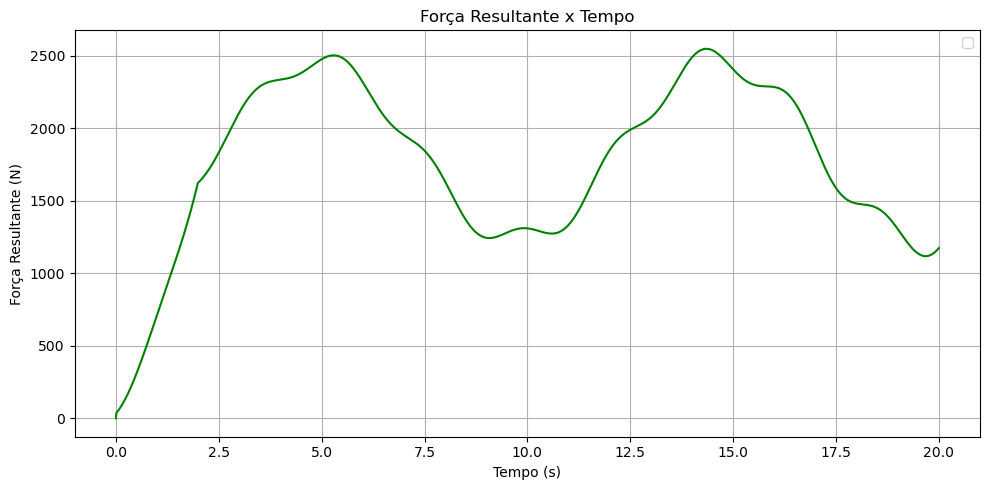

In [149]:
plt.figure(figsize=(10, 5))
plt.plot(t_calc, F_resultante_calc, color='green')
plt.title('Força Resultante x Tempo')
plt.xlabel('Tempo (s)')
plt.ylabel('Força Resultante (N)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [150]:
# Definindo os parâmetros do impulso (força inicial é 700 N aumenta ao longo do tempo)

F_inicial = 700                                             # Força inicial de impulso (em Newtons)
impulso_fator = 1.10                                        # Novo fator de aumento da força (10% a cada 0,20s)
t_ajuste_impulso = 0.10                                     # Tempo de ajuste de impulso (a cada 0,10 segundos)

# Inicializando os arrays para armazenar os resultados

t_calc = np.linspace(0, t_max, passos_sim)
x1_calc = np.zeros(passos_sim)
x2_calc = np.zeros(passos_sim)
x3_calc = np.zeros(passos_sim)
x4_calc = np.zeros(passos_sim)
x2_dot_calc = np.zeros(passos_sim)                         # Aceleração de x1 (m1)
x4_dot_calc = np.zeros(passos_sim)                         # Aceleração de x3 (m2)
F1_calc = np.zeros(passos_sim)                             # Força F1
F2_calc = np.zeros(passos_sim)                             # Força F2
F_resultante_calc = np.zeros(passos_sim)                   # Força resultante (F1 + F2)

# Inicializar o tempo acumulado e o valor da força de impulso
tempo_acumulado = 0.0
Fimp = F_inicial

# Método de Euler

for i in range(1, passos_sim):
    x1_calc[i] = x1_calc[i-1] + t_int_sim*x2_calc[i-1]
    x2_calc[i] = x2_calc[i-1] + t_int_sim*x2_dot(x1_calc[i-1], x2_calc[i-1], x3_calc[i-1], x4_calc[i-1])
    x3_calc[i] = x3_calc[i-1] + t_int_sim*x4_calc[i-1]
    x4_calc[i] = x4_calc[i-1] + t_int_sim*x4_dot(x1_calc[i-1], x2_calc[i-1], x3_calc[i-1], x4_calc[i-1])

    x2_dot_calc[i] = x2_dot(x1_calc[i], x2_calc[i], x3_calc[i], x4_calc[i])
    x4_dot_calc[i] = x4_dot(x1_calc[i], x2_calc[i], x3_calc[i], x4_calc[i])

    F1_calc[i] = F1(x1_calc[i], x2_calc[i], x3_calc[i], x4_calc[i])
    F2_calc[i] = F2(x1_calc[i], x2_calc[i], x3_calc[i], x4_calc[i])

    # Atualiza a força de impulso

    tempo_acumulado += t_int_sim
    if tempo_acumulado >= t_ajuste_impulso:
        Fimp = F_inicial*(impulso_fator**int(tempo_acumulado//t_ajuste_impulso))
        tempo_acumulado = 0.0  # Reinicia o contador de tempo
    F_resultante_calc[i] = F1_calc[i] + F2_calc[i] + Fimp

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


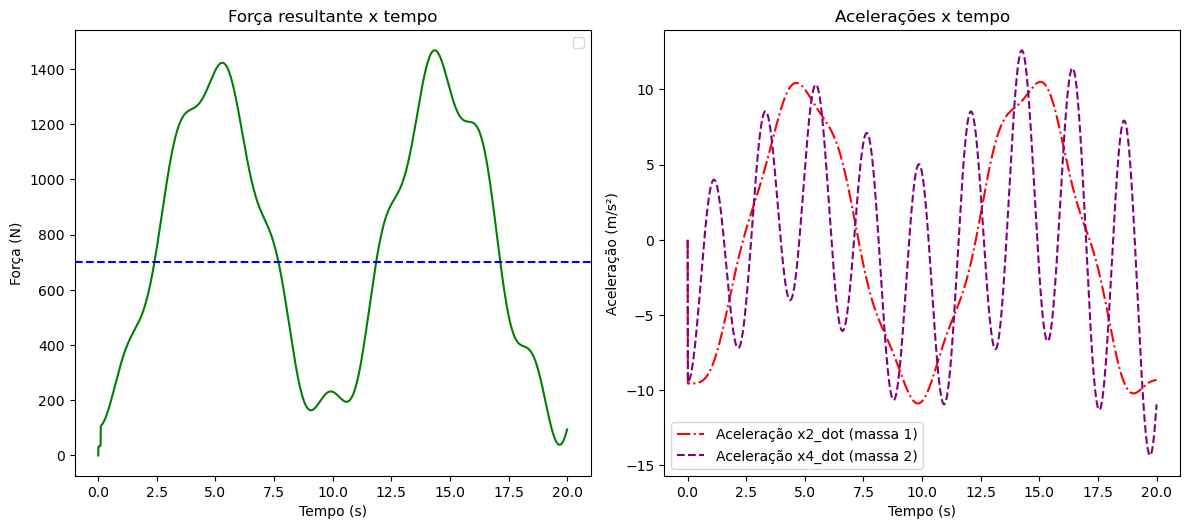

In [151]:
plt.figure(figsize=(12, 10))
plt.subplot(2, 2, 3)
plt.plot(t_calc, F_resultante_calc,color="green")
plt.title("Força resultante x tempo")
plt.xlabel("Tempo (s)")
plt.ylabel("Força (N)")
plt.axhline(y=700, color='blue', linestyle='--',)
plt.legend()
plt.subplot(2, 2, 4)
plt.plot(t_calc, x2_dot_calc, label="Aceleração x2_dot (massa 1)", linestyle="-.", color='red')
plt.plot(t_calc, x4_dot_calc, label="Aceleração x4_dot (massa 2)", linestyle="--", color='purple')
plt.title("Acelerações x tempo")
plt.xlabel("Tempo (s)")
plt.ylabel("Aceleração (m/s²)")
plt.legend()
plt.tight_layout()
plt.show()